In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\moham\AppData\Local\Temp\ipykernel_12632\1184982148.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [3]:
df.shape

(364558, 53)

In [4]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


# Identify variables with null values

In [6]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

# Perform basic data exploratory analysis:

In [7]:
df['Closed Date']=pd.to_datetime(df['Closed Date'])

In [8]:
  df['Closed Date'].isnull().sum()

2381

# Utilize missing value treatment

In [9]:
cdf=df.fillna({'Descriptor':'Unknown','Location Type':'Unknown','Incident Zip':'0','Incident Address':'Unknown','Street Name':'unknown','Cross Street 1':'unknown','Cross Street 2':'unknown','Address Type':'unknown','City':'unknown','Facility Type':'unknown','Status':'unknown','Resolution Action Updated Date':'0','X Coordinate (State Plane)':'0','Y Coordinate (State Plane)':'0','Location':'0'})

In [10]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [11]:
df=df.drop(['Intersection Street 1', 'Intersection Street 2','Landmark', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name'],axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  object        
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      358057 non-null  object        
 7   Location Type                   364425 non-null  object        
 8   Incident Zip                    361560 non-null  float64       
 9   Incident Address                312859 non-null  object        
 10  Street Name                     312859 non-null  object 

# Analyze the date column and remove the entries if it has an incorrect timeline

In [13]:
df['Closed Date']= pd.to_datetime(df['Closed Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  object        
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      358057 non-null  object        
 7   Location Type                   364425 non-null  object        
 8   Incident Zip                    361560 non-null  float64       
 9   Incident Address                312859 non-null  object        
 10  Street Name                     312859 non-null  object 

In [14]:
df[df.isnull().any(axis=1)]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
33,32306700,12/31/2015 11:18:10 PM,2016-01-02 01:04:03,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,NaN,25-0-25-54 12TH STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
37,32307213,12/31/2015 11:12:45 PM,2016-01-01 05:37:20,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11375.0,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.736399,-73.845909,"(40.73639857849262, -73.84590947131231)"
38,32308014,12/31/2015 11:11:33 PM,2015-12-31 23:41:01,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11211.0,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.714007,-73.941715,"(40.714007352909874, -73.94171469793936)"
83,32305846,12/31/2015 10:40:46 PM,2015-12-31 22:55:33,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11209.0,COLONIAL ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.634101,-74.032624,"(40.63410061166329, -74.03262417565837)"
85,32305085,12/31/2015 10:40:01 PM,2015-12-31 23:21:46,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11379.0,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.711532,-73.895943,"(40.71153224007471, -73.89594304802966)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364530,29613202,01/01/2015 12:37:13 AM,2015-01-01 02:43:29,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Vehicle,Street/Sidewalk,10466.0,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.883861,-73.855885,"(40.88386089034769, -73.85588536774581)"
364536,29607433,01/01/2015 12:29:54 AM,2015-01-01 01:25:19,NYPD,New York City Police Department,Illegal Fireworks,NaN,Park/Playground,11414.0,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.656839,-73.844136,"(40.656838986134865, -73.84413620074776)"
364549,29610965,01/01/2015 12:08:02 AM,2015-01-01 01:17:43,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11368.0,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.738847,-73.863752,"(40.73884743426441, -73.86375174412073)"
364551,29607567,01/01/2015 12:06:02 AM,2015-01-01 00:43:41,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10453.0,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.848639,-73.911679,"(40.84863947227845, -73.91167941229558)"


In [15]:
df['Closed Date'].fillna(0)
df['Closed Date']

0        2016-01-01 00:55:15
1        2016-01-01 01:26:57
2        2016-01-01 04:51:03
3        2016-01-01 07:43:13
4        2016-01-01 03:24:42
                 ...        
364553   2015-01-01 10:22:31
364554   2015-01-01 02:25:02
364555   2015-01-01 00:20:33
364556   2015-01-01 02:42:22
364557   2015-01-01 02:47:50
Name: Closed Date, Length: 364558, dtype: datetime64[ns]

# Draw a frequency plot for city-wise complaints

In [16]:
f=df['City'].value_counts()
f

BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

Text(0.5, 1.0, 'Frequency of complaints across cities')

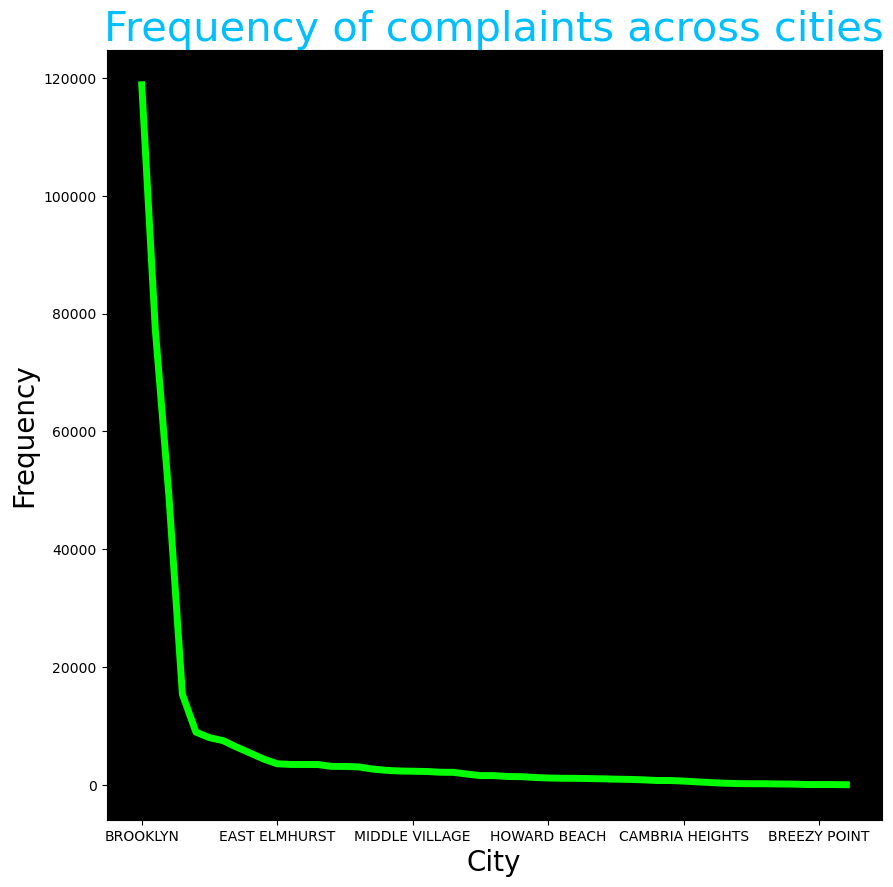

In [17]:
f.plot(figsize=(10,10),color='lime',linewidth=5).set_facecolor('black')
plt.xlabel('City',size=20)
plt.ylabel('Frequency',size=20)
plt.title("Frequency of complaints across cities",size=30,color='deepskyblue')

# Scatter and Hexbin plots for complaint concentration across Brooklyn

In [18]:
df[df['City']=='BROOKLYN'].groupby(['Borough',"Complaint Type","Descriptor"]).head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
5,32306554,12/31/2015 11:56:30 PM,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
9,32308391,12/31/2015 11:53:58 PM,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"
13,32305074,12/31/2015 11:47:58 PM,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)"
17,32310273,12/31/2015 11:44:52 PM,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)"
18,32306617,12/31/2015 11:40:59 PM,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173600,31145217,07/23/2015 08:27:49 PM,2015-07-23 21:02:58,NYPD,New York City Police Department,Graffiti,Police Report Not Requested,Store/Commercial,11231.0,113 HAMILTON AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.681801,-74.004958,"(40.68180118071357, -74.00495751822662)"
180567,31102396,07/17/2015 02:17:57 PM,2015-07-17 16:16:33,NYPD,New York City Police Department,Traffic,Congestion/Gridlock,Highway,10023.0,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.779404,-73.988807,"(40.77940422566538, -73.98880666690309)"
276985,30476071,04/24/2015 08:13:41 PM,2015-04-24 23:20:29,NYPD,New York City Police Department,Noise - House of Worship,Loud Television,House of Worship,11217.0,415 ATLANTIC AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.686653,-73.984092,"(40.68665294437386, -73.98409151855587)"
279508,30450794,04/21/2015 10:06:21 PM,2015-04-22 13:50:12,NYPD,New York City Police Department,Graffiti,Police Report Not Requested,Residential Building/House,11223.0,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.607629,-73.963892,"(40.60762879826825, -73.96389174049484)"


In [19]:
d=df[df['City']=='BROOKLYN']

In [20]:
d['Latitude']=d['Latitude'].dropna()
d['Longitude']=d['Longitude'].dropna()

C:\Users\moham\AppData\Local\Temp\ipykernel_12632\1920064103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Latitude']=d['Latitude'].dropna()
C:\Users\moham\AppData\Local\Temp\ipykernel_12632\1920064103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Longitude']=d['Longitude'].dropna()


# HEXBIN PLOT

(-74.05061403048781, -73.8464793432815, 40.561126853754885, 40.78979838623255)

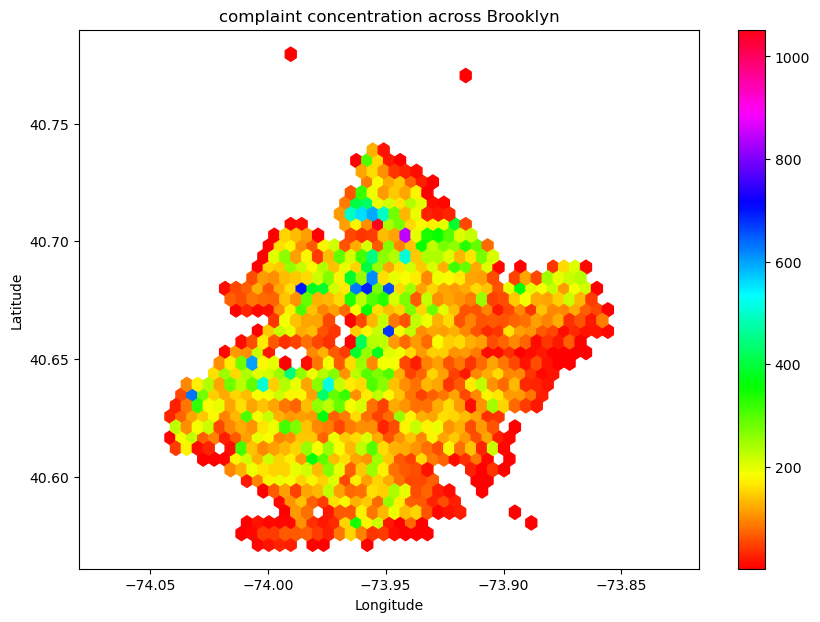

In [21]:
d.plot.hexbin( x='Longitude', y='Latitude', gridsize=40,
     cmap="hsv",mincnt=1,title = 'complaint concentration across Brooklyn', figsize=(10,7)).axis('equal')

# SCATTER PLOT

C:\Users\moham\AppData\Local\Temp\ipykernel_12632\1185931506.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label = 'Gamma Ray - API');


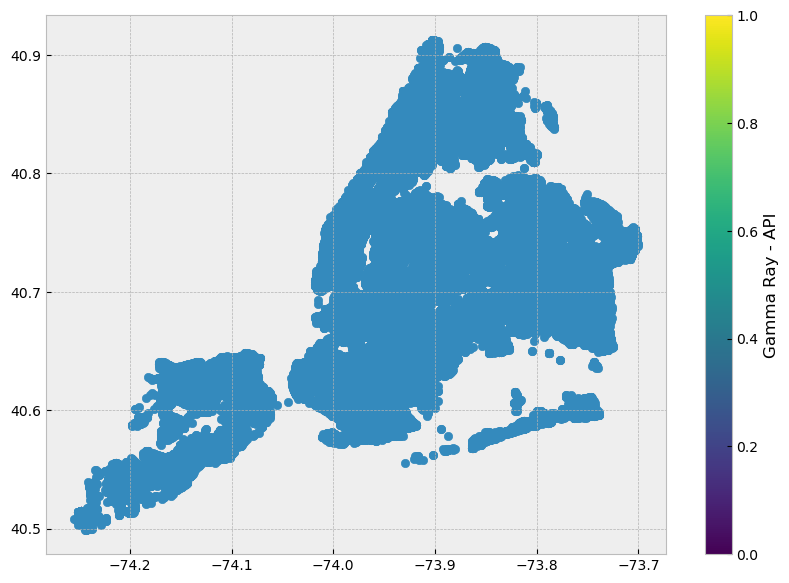

In [22]:
plt.style.use('bmh')
plt.figure(figsize=(10,7))
plt.scatter(x = df['Longitude'], y=df['Latitude'],vmin = 0, vmax = 100, cmap = 'rainbow' )
plt.colorbar(label = 'Gamma Ray - API'); 

Text(0.5, 1.0, 'Complaints Type\n')

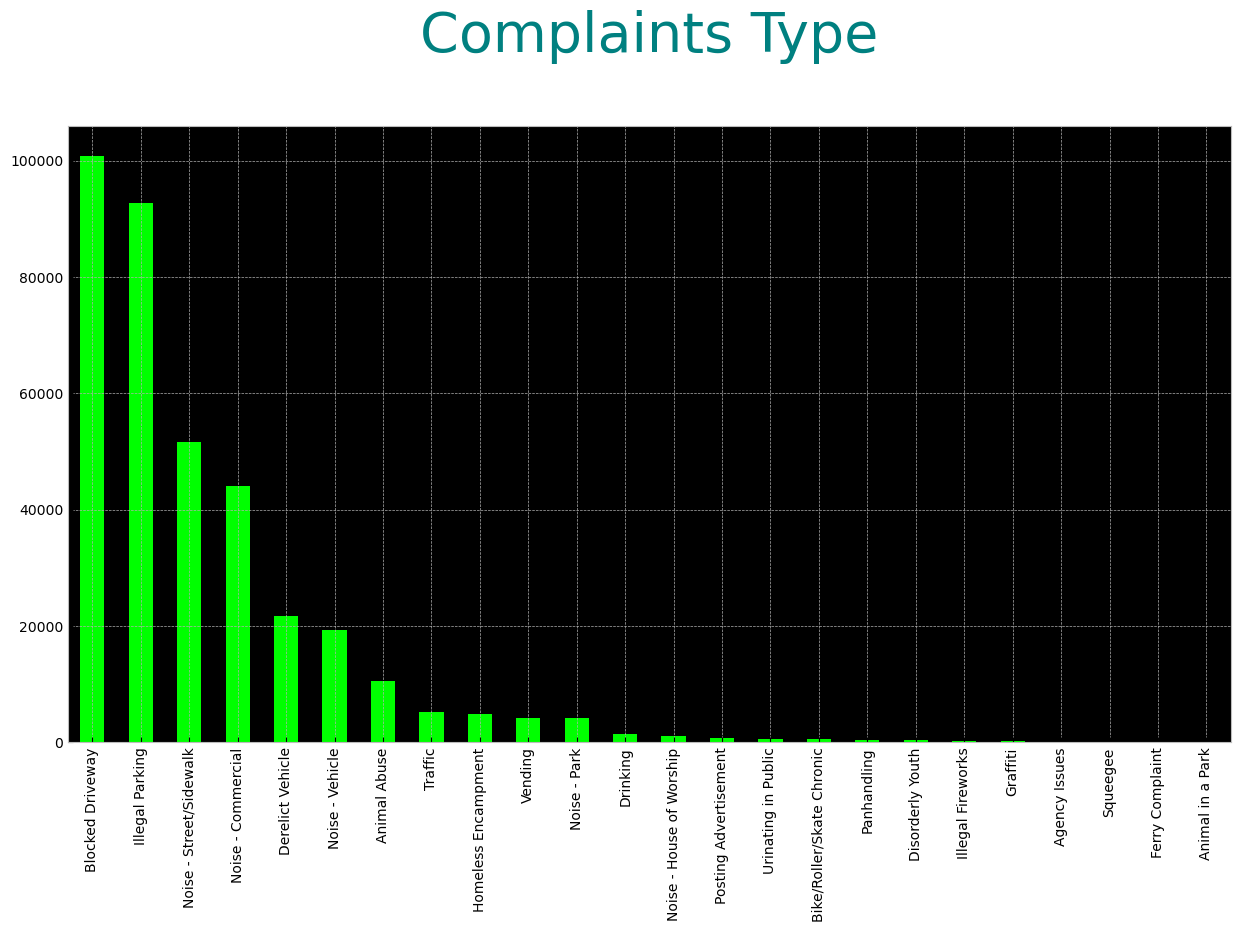

In [23]:
df['Complaint Type'].value_counts().plot.bar(figsize=(15,8), color="lime").set_facecolor('black')
plt.title("Complaints Type\n",size=40,color='teal')

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


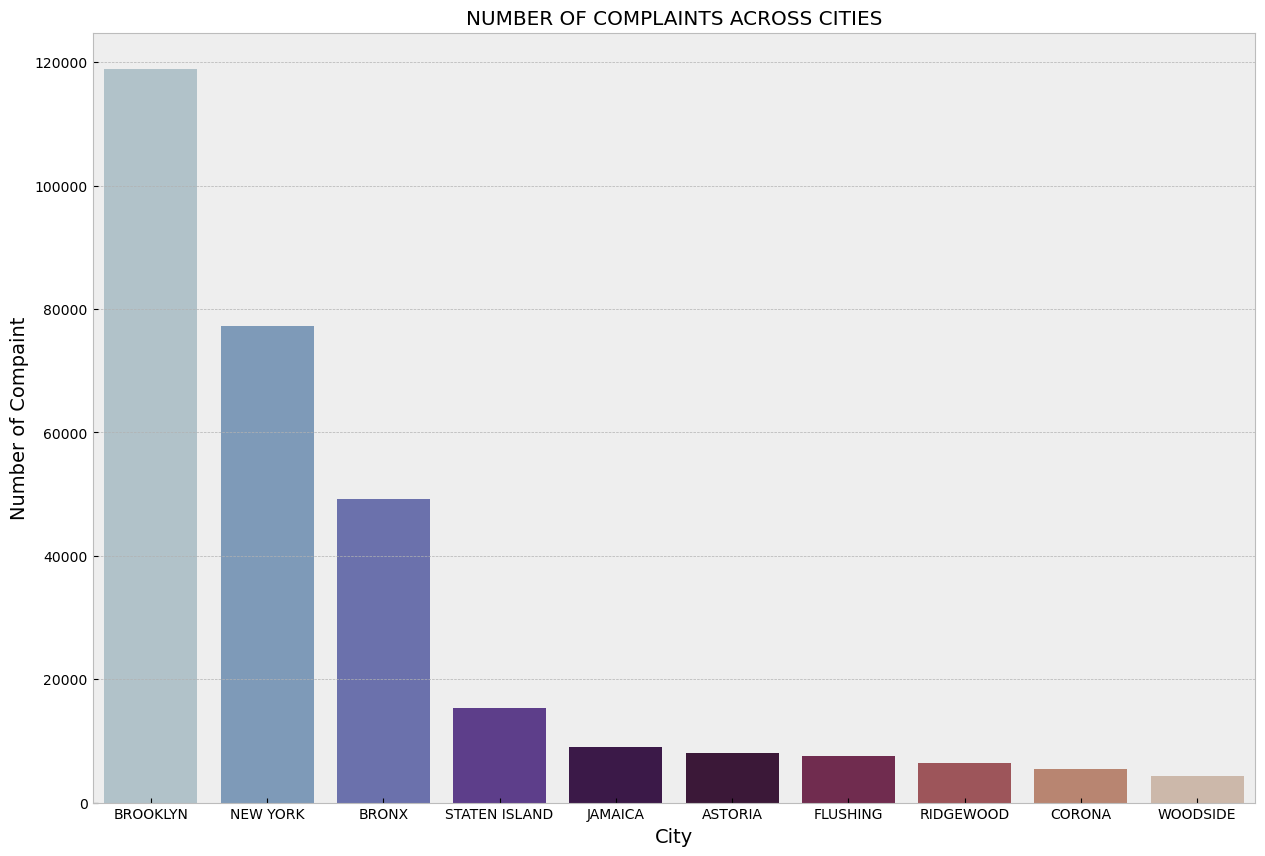

In [24]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df['City'] , order = df['City'].value_counts().head(10).index , palette='twilight')
plt.title('NUMBER OF COMPLAINTS ACROSS CITIES')
plt.xlabel('City', fontsize = 14)
plt.ylabel('Number of Compaint', fontsize = 14)
plt.show()                           

# Top 10 types of complaints

In [25]:
f = pd.DataFrame(df['Complaint Type'].value_counts().head(10))
f

,Complaint Type
Blocked Driveway,100881
Illegal Parking,92679
Noise - Street/Sidewalk,51692
Noise - Commercial,44109
Derelict Vehicle,21661
Noise - Vehicle,19352
Animal Abuse,10541
Traffic,5198
Homeless Encampment,4879
Vending,4192


# Display the types of complaints in each city in a separate dataset

In [26]:
majcomp=df.groupby(['City',"Complaint Type"])

sortedComplaintType = majcomp.size().sort_values(ascending = False)
sortedComplaintType.head(10)

City      Complaint Type         
BROOKLYN  Blocked Driveway           36447
          Illegal Parking            33533
NEW YORK  Noise - Street/Sidewalk    22252
          Noise - Commercial         18692
BRONX     Blocked Driveway           17063
NEW YORK  Illegal Parking            14553
BROOKLYN  Noise - Street/Sidewalk    13984
          Noise - Commercial         13860
BRONX     Illegal Parking             9889
          Noise - Street/Sidewalk     9146
dtype: int64

In [27]:
complaintTypecity = pd.DataFrame({'count':
                                  df.groupby(['City','Complaint Type']).size()}).reset_index()

In [28]:
  complaintTypecity

,City,Complaint Type,count
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1
...,...,...,...
772,Woodside,Blocked Driveway,27
773,Woodside,Derelict Vehicle,8
774,Woodside,Illegal Parking,124
775,Woodside,Noise - Commercial,2


In [29]:
gb=df.groupby(['City','Borough','Complaint Type'])

In [30]:
counts=gb.size().to_frame().reset_index()

In [31]:
counts[:20]

,City,Borough,Complaint Type,0
0,ARVERNE,QUEENS,Animal Abuse,46
1,ARVERNE,QUEENS,Blocked Driveway,50
2,ARVERNE,QUEENS,Derelict Vehicle,32
3,ARVERNE,QUEENS,Disorderly Youth,2
4,ARVERNE,QUEENS,Drinking,1
5,ARVERNE,QUEENS,Graffiti,1
6,ARVERNE,QUEENS,Homeless Encampment,4
7,ARVERNE,QUEENS,Illegal Parking,62
8,ARVERNE,QUEENS,Noise - Commercial,2
9,ARVERNE,QUEENS,Noise - House of Worship,14


In [32]:
counts=counts.rename(columns={0:'Count'})

In [33]:
counts.head(20)

,City,Borough,Complaint Type,Count
0,ARVERNE,QUEENS,Animal Abuse,46
1,ARVERNE,QUEENS,Blocked Driveway,50
2,ARVERNE,QUEENS,Derelict Vehicle,32
3,ARVERNE,QUEENS,Disorderly Youth,2
4,ARVERNE,QUEENS,Drinking,1
5,ARVERNE,QUEENS,Graffiti,1
6,ARVERNE,QUEENS,Homeless Encampment,4
7,ARVERNE,QUEENS,Illegal Parking,62
8,ARVERNE,QUEENS,Noise - Commercial,2
9,ARVERNE,QUEENS,Noise - House of Worship,14


# Visualize the major types of complaints in each city

In [34]:
for i, row in counts.iterrows():
  print(i,row['City'],row['Borough'],row['Complaint Type'],row['Count'])


0 ARVERNE QUEENS Animal Abuse 46
1 ARVERNE QUEENS Blocked Driveway 50
2 ARVERNE QUEENS Derelict Vehicle 32
3 ARVERNE QUEENS Disorderly Youth 2
4 ARVERNE QUEENS Drinking 1
5 ARVERNE QUEENS Graffiti 1
6 ARVERNE QUEENS Homeless Encampment 4
7 ARVERNE QUEENS Illegal Parking 62
8 ARVERNE QUEENS Noise - Commercial 2
9 ARVERNE QUEENS Noise - House of Worship 14
10 ARVERNE QUEENS Noise - Park 2
11 ARVERNE QUEENS Noise - Street/Sidewalk 29
12 ARVERNE QUEENS Noise - Vehicle 10
13 ARVERNE QUEENS Panhandling 1
14 ARVERNE QUEENS Traffic 1
15 ARVERNE QUEENS Urinating in Public 1
16 ARVERNE QUEENS Vending 1
17 ASTORIA QUEENS Animal Abuse 170
18 ASTORIA QUEENS Bike/Roller/Skate Chronic 16
19 ASTORIA QUEENS Blocked Driveway 3436
20 ASTORIA QUEENS Derelict Vehicle 426
21 ASTORIA QUEENS Disorderly Youth 5
22 ASTORIA QUEENS Drinking 43
23 ASTORIA QUEENS Graffiti 4
24 ASTORIA QUEENS Homeless Encampment 32
25 ASTORIA QUEENS Illegal Fireworks 4
26 ASTORIA QUEENS Illegal Parking 1340
27 ASTORIA QUEENS Noise -

In [35]:
max_per_city = {}

for i, row in counts.iterrows():
  city = row['City']
  coty = row['Complaint Type']
  count = row['Count']

  if city not in max_per_city:
    max_per_city[city] = (None,0)


  max_coty , max_count = max_per_city[city]

  if count > max_count:
    max_per_city[city] = (coty,count)

In [36]:
max_per_city

{'ARVERNE': ('Illegal Parking', 62),
 'ASTORIA': ('Blocked Driveway', 3436),
 'Astoria': ('Noise - Commercial', 311),
 'BAYSIDE': ('Illegal Parking', 638),
 'BELLEROSE': ('Blocked Driveway', 138),
 'BREEZY POINT': ('Illegal Parking', 16),
 'BRONX': ('Blocked Driveway', 17063),
 'BROOKLYN': ('Blocked Driveway', 36447),
 'CAMBRIA HEIGHTS': ('Blocked Driveway', 177),
 'CENTRAL PARK': ('Noise - Street/Sidewalk', 105),
 'COLLEGE POINT': ('Blocked Driveway', 597),
 'CORONA': ('Blocked Driveway', 3597),
 'EAST ELMHURST': ('Blocked Driveway', 1925),
 'ELMHURST': ('Blocked Driveway', 1992),
 'East Elmhurst': ('Illegal Parking', 28),
 'FAR ROCKAWAY': ('Blocked Driveway', 383),
 'FLORAL PARK': ('Derelict Vehicle', 74),
 'FLUSHING': ('Blocked Driveway', 3641),
 'FOREST HILLS': ('Blocked Driveway', 873),
 'FRESH MEADOWS': ('Illegal Parking', 1158),
 'GLEN OAKS': ('Illegal Parking', 95),
 'HOLLIS': ('Blocked Driveway', 442),
 'HOWARD BEACH': ('Illegal Parking', 384),
 'Howard Beach': ('Blocked Drive

In [37]:
max_counts = counts.groupby('City')['Count'].transform(max)

In [38]:
max_counts

0       62
1       62
2       62
3       62
4       62
      ... 
787    124
788    124
789    124
790    124
791    124
Name: Count, Length: 792, dtype: int64

In [39]:
counts[counts['Count'] == max_counts]

,City,Borough,Complaint Type,Count
7,ARVERNE,QUEENS,Illegal Parking,62
19,ASTORIA,QUEENS,Blocked Driveway,3436
40,Astoria,QUEENS,Noise - Commercial,311
49,BAYSIDE,QUEENS,Illegal Parking,638
59,BELLEROSE,QUEENS,Blocked Driveway,138
79,BREEZY POINT,QUEENS,Illegal Parking,16
85,BRONX,BRONX,Blocked Driveway,17063
108,BROOKLYN,BROOKLYN,Blocked Driveway,36447
130,CAMBRIA HEIGHTS,QUEENS,Blocked Driveway,177
141,CENTRAL PARK,MANHATTAN,Noise - Street/Sidewalk,105


In [40]:
mc = counts[counts['Count'] == max_counts]

In [41]:
mc.set_index('City' , inplace = True)

<AxesSubplot:xlabel='City'>

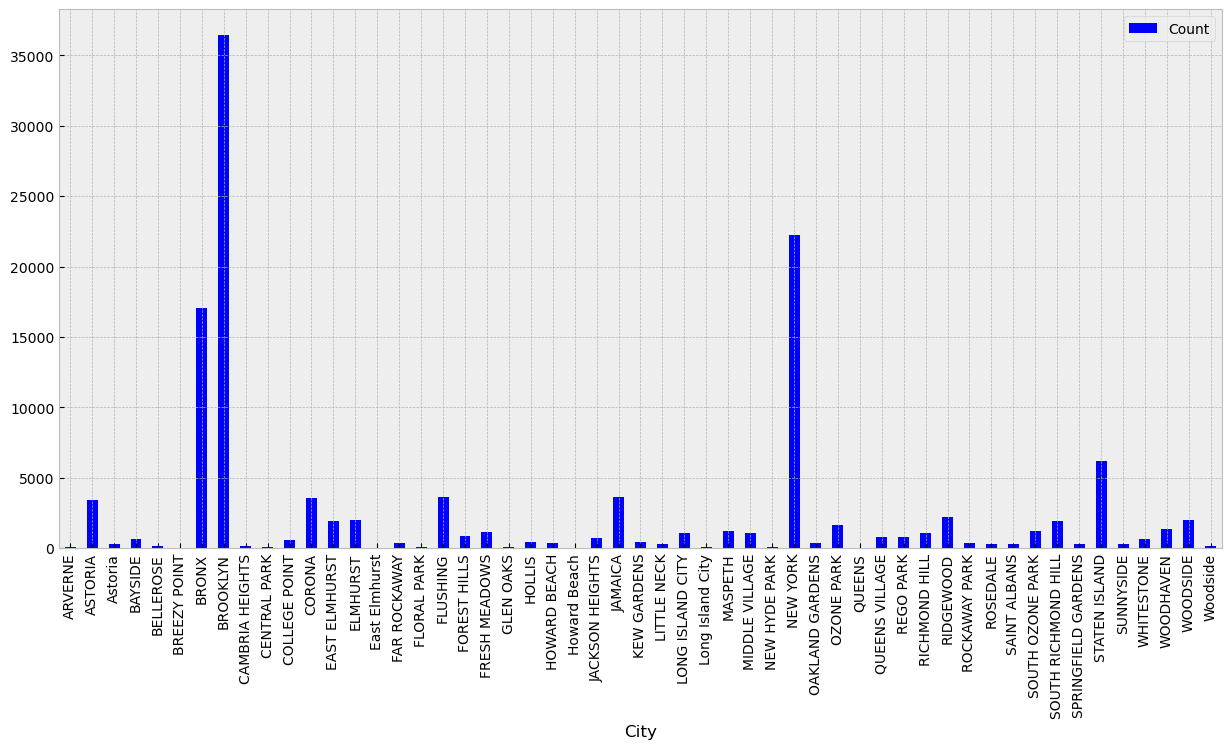

In [42]:
mc.plot(kind = 'bar' , figsize =(15,7) , color = ['blue'])

In [43]:
mc['Percentage'] = np.around((mc.Count/mc.Count.sum())*100,decimals=2)

C:\Users\moham\AppData\Local\Temp\ipykernel_12632\413434807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc['Percentage'] = np.around((mc.Count/mc.Count.sum())*100,decimals=2)


In [44]:
mc  

,Borough,Complaint Type,Count,Percentage
City,,,,
ARVERNE,QUEENS,Illegal Parking,62,0.05
ASTORIA,QUEENS,Blocked Driveway,3436,2.72
Astoria,QUEENS,Noise - Commercial,311,0.25
BAYSIDE,QUEENS,Illegal Parking,638,0.50
BELLEROSE,QUEENS,Blocked Driveway,138,0.11
BREEZY POINT,QUEENS,Illegal Parking,16,0.01
BRONX,BRONX,Blocked Driveway,17063,13.49
BROOKLYN,BROOKLYN,Blocked Driveway,36447,28.82
CAMBRIA HEIGHTS,QUEENS,Blocked Driveway,177,0.14


In [45]:
mc = mc[mc.Percentage>1.0]
mc = mc.reset_index()
mc = mc.rename(columns={'index':'Complaint Type'})
mc

,City,Borough,Complaint Type,Count,Percentage
0,ASTORIA,QUEENS,Blocked Driveway,3436,2.72
1,BRONX,BRONX,Blocked Driveway,17063,13.49
2,BROOKLYN,BROOKLYN,Blocked Driveway,36447,28.82
3,CORONA,QUEENS,Blocked Driveway,3597,2.84
4,EAST ELMHURST,QUEENS,Blocked Driveway,1925,1.52
5,ELMHURST,QUEENS,Blocked Driveway,1992,1.58
6,FLUSHING,QUEENS,Blocked Driveway,3641,2.88
7,JAMAICA,QUEENS,Blocked Driveway,3621,2.86
8,NEW YORK,MANHATTAN,Noise - Street/Sidewalk,22252,17.59
9,OZONE PARK,QUEENS,Blocked Driveway,1681,1.33


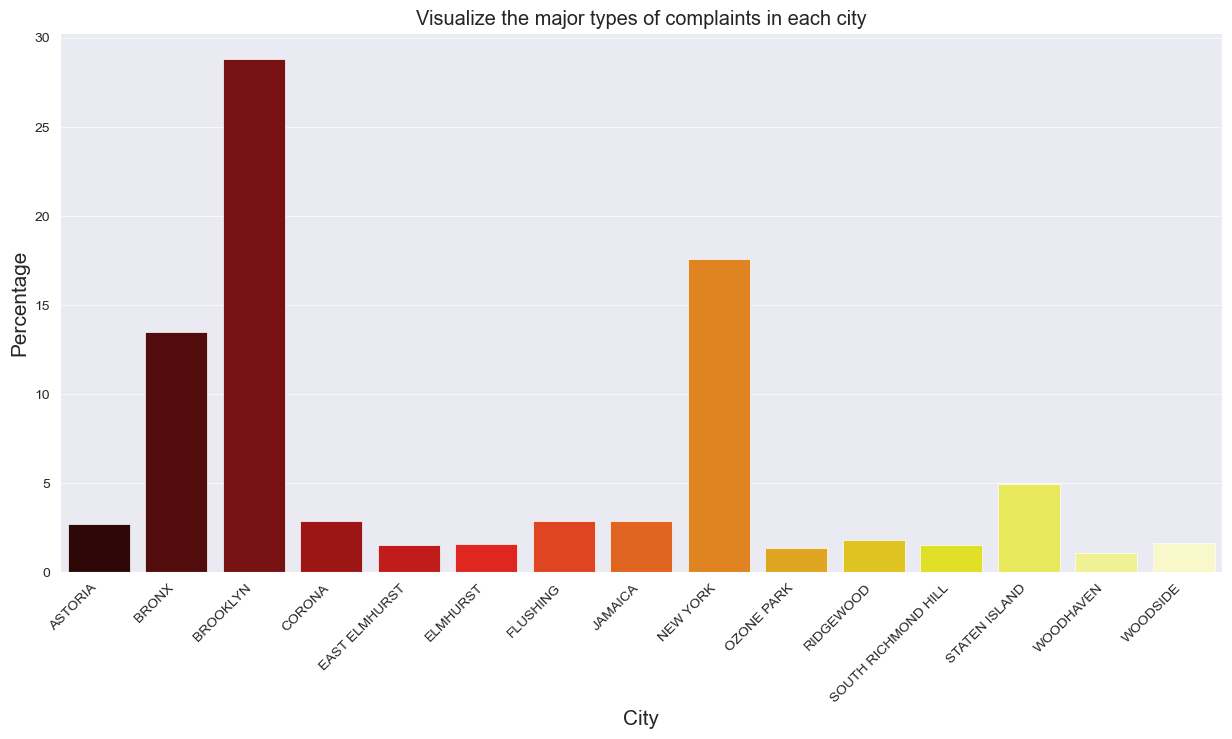

In [46]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
co_type = sns.barplot(x = mc['City'] , y = mc['Percentage'] , data = mc, palette = 'hot')
co_type.set_xticklabels(co_type.get_xticklabels(), rotation = 45, ha = 'right')
plt.title('Visualize the major types of complaints in each city')
plt.xlabel('City' , fontsize = 15)
plt.ylabel('Percentage' , fontsize = 15)
plt.show()

#  Check if the average response time across various types of complaints

In [47]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Request_time'] = df['Closed Date'] - df['Created Date']
gf = df[['City' , 'Complaint Type','Request_time']]
gf

,City,Complaint Type,Request_time
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:30
1,ASTORIA,Blocked Driveway,0 days 01:27:13
2,BRONX,Blocked Driveway,0 days 04:51:34
3,BRONX,Illegal Parking,0 days 07:45:27
4,ELMHURST,Illegal Parking,0 days 03:27:44
...,...,...,...
364553,WOODHAVEN,Illegal Parking,0 days 10:17:47
364554,BRONX,Noise - Vehicle,0 days 02:20:34
364555,NEW YORK,Noise - Street/Sidewalk,0 days 00:19:03
364556,BRONX,Blocked Driveway,0 days 02:40:53


In [48]:
tr = gf['Request_time'].mean()
tr

Timedelta('0 days 04:11:53.299632500')

In [49]:
tr.components

Components(days=0, hours=4, minutes=11, seconds=53, milliseconds=299, microseconds=632, nanoseconds=500)